In [13]:
import glob

image_path = glob.glob('./data/train/*/*')

In [16]:
from PIL import Image

In [25]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'

# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    img = Image.open(image_path[1532])
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

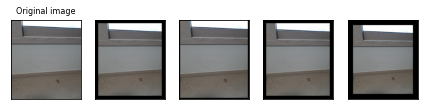

In [26]:
# 반점 3
# 틈새과다 3
# 가구수정 2
# 녹오염 2
# 이음부불량 2
# 울음 2
# 창틀,문틀수정 2
# 피스 1
# 들뜸 1
# 석고수정 1
# 면불량 1
# 몰딩수정
padded_imgs = [T.Pad(padding=padding)(img) for padding in (30, 10, 30, 50)]
## Pad
plot(padded_imgs)

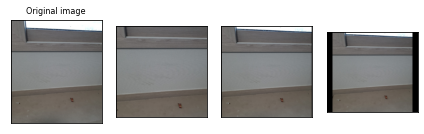

In [34]:
# 반점 5
# 틈새과다 4
# 가구수정 4
# 녹오염 4
# 이음부불량 4
# 울음 4
# 창틀,문틀수정 4
# 피스 3
# 들뜸 3
# 석고수정 3
# 면불량 3
# 몰딩수정 2
# 오타공 2
# 곰팡이 2
# 터짐 2
# 꼬임 1
# 걸레받이수정 1
# 오염 1
# 훼손 0 
center_crops = [T.CenterCrop(size=size)(img) for size in (500,600, img.size)]
plot(center_crops)

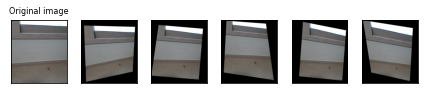

In [75]:
# 반점 5
# 틈새과다 4
# 가구수정 4
# 녹오염 4
# 이음부불량 4
# 울음 4
# 창틀,문틀수정 4
# 피스 3
# 들뜸 3
# 석고수정 3
# 면불량 3
# 몰딩수정 2
# 오타공 2
# 곰팡이 2
# 터짐 2
# 꼬임 1
# 걸레받이수정 1
# 오염 1
# 훼손 1 
perspective_transformer = T.RandomPerspective(distortion_scale=0.4, p=1.0)
perspective_imgs = [perspective_transformer(img) for _ in range(5)]
plot(perspective_imgs)

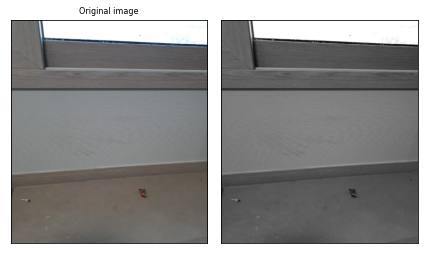

In [36]:
# 반점 2
# 틈새과다 2
# 가구수정 2
# 녹오염 2
# 이음부불량 2
# 울음 2
# 창틀,문틀수정 2
# 피스 1
# 들뜸 1
# 석고수정 1
# 면불량 1
# 몰딩수정 1
# 오타공 1
# 곰팡이 1
# 터짐 1
# 꼬임 0
# 걸레받이수정 0
# 오염 0
# 훼손 0 
gray_img = T.Grayscale()(img)
plot([gray_img], cmap='gray')

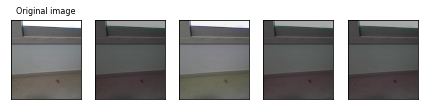

In [37]:
# 반점 5
# 틈새과다 4
# 가구수정 4
# 녹오염 4
# 이음부불량 4
# 울음 4
# 창틀,문틀수정 4
# 피스 3
# 들뜸 3
# 석고수정 3
# 면불량 3
# 몰딩수정 2
# 오타공 2
# 곰팡이 2
# 터짐 2
# 꼬임 1
# 걸레받이수정 1
# 오염 1
# 훼손 1 
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(img) for _ in range(4)]
plot(jitted_imgs)

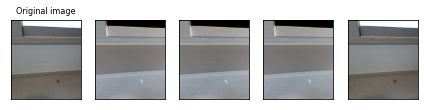

In [49]:
# 반점 1
# 틈새과다 1
# 가구수정 1
# 녹오염 1
# 이음부불량 1
# 울음 1
# 창틀,문틀수정 1
# 피스 1
# 들뜸 1
# 석고수정 1
# 면불량 1
# 몰딩수정 1
# 오타공 1
# 곰팡이 1
# 터짐 1
# 꼬임 0
# 걸레받이수정 0
# 오염 0
# 훼손 0 
inverter = T.RandomInvert()
invertered_imgs = [inverter(img) for _ in range(4)]
plot(invertered_imgs)

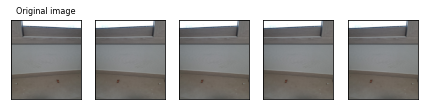

In [76]:
# 다 1개 
hflipper = T.RandomHorizontalFlip(p=1)
transformed_imgs = [hflipper(img) for _ in range(4)]
plot(transformed_imgs)

In [ ]:
# 오타공 1
# 곰팡이 1
# 오염 1
# 석고수정 1
# 반점 1
# 면불량 1
# 들뜸 1
# 울음 1
# 이음부 불량 1
# 터짐 1
# 틈새과다 1
# 피스 1
# 훼손 1

vflipper = T.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(img) for _ in range(4)]
plot(transformed_imgs)

In [ ]:
# 반점
# 웬만한거 다 적용 OK 

In [ ]:
# 틈새과다

In [ ]:
# 가구 수정
# 녹오염
# 이음부불량
# 울음
# 창틀, 문틀 수정
# 피스
# 들뜸
# 석고 수정
# 면불량
# 몰딩수정
# 오타공
# 곰팡이
# 터짐
# 꼬임
# 걸레받이 수정
# 오염

In [9]:
import pandas as pd
df = pd.read_csv('baseline_submit.csv',encoding='cp949')
df.head()

,id,label
0,TEST_000,훼손
1,TEST_001,훼손
2,TEST_002,훼손
3,TEST_003,훼손
4,TEST_004,훼손


In [10]:
df['label'] = '훼손'

In [11]:
df.to_csv('test.csv',index=False)